In [52]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


def read_data(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

        # tokenize with nltk
    lines = [word_tokenize(line) for line in lines]

    # convert to lowercase
    lines = [[token.lower() for token in line] for line in lines]

    # if token contains digits, replace it with __NUM
    for line in lines:
        for i in range(len(line)):
            if any(char.isdigit() for char in line[i]):
                line[i] = '__NUM'

    # join tokens into a sentence
    # lines = [' '.join(line) for line in lines]

    return lines

styleins_data = {
    'ours_gt': 'StyleINS/ours_formal.txt',
    'ours_output': 'StyleINS/ours_to1.txt',
    'gyafc_gt': 'StyleINS/gyafc_test_formal.txt',
    'gyafc_output': 'StyleINS/gyafc_to1.txt',
}

# read data
styleins_data = {k: read_data(v) for k, v in styleins_data.items()}

# print first 5 sentences from each dataset
for k, v in styleins_data.items():
    print(k)
    for line in v[:5]:
        print(line)
    print()

ours_gt
['do', "n't", 'ever', 'let', 'somebody', 'tell', 'you', 'that', 'you', 'can', 'not', 'do', 'something', ',', 'not', 'even', 'me', '.']
['i', 'am', 'the', 'type', 'of', 'person', 'who', ',', 'if', 'you', 'ask', 'me', 'a', 'question', 'and', 'i', 'do', "n't", 'know', 'the', 'answer', ',', 'i', 'will', 'inform', 'you', 'that', 'i', 'do', 'not', 'know', '.']
['however', ',', 'i', 'am', 'confident', 'that', 'i', 'have', 'the', 'skills', 'to', 'find', 'the', 'answer', 'and', 'will', 'do', 'so', '.']
['there', 'is', 'an', "'", 'i', "'", 'in', '``', 'happiness', ',', "''", 'and', 'there', 'is', 'no', "'", 'y', '.', "'", 'it', 'is', 'spelled', 'with', 'an', "'", 'i', '.', "'"]
['if', 'you', 'have', 'a', 'dream', ',', 'you', 'must', 'protect', 'it', '.']

ours_output
['do', 'not', 'ever', 'let', 'somebody', 'tell', 'you', 'you', 'can', 'not', 'do', 'something', ',', 'not', 'even', 'me', '.']
['i', "'m", 'the', 'type', 'of', 'person', ',', 'if', 'you', 'ask', 'me', 'a', 'question', ',', '

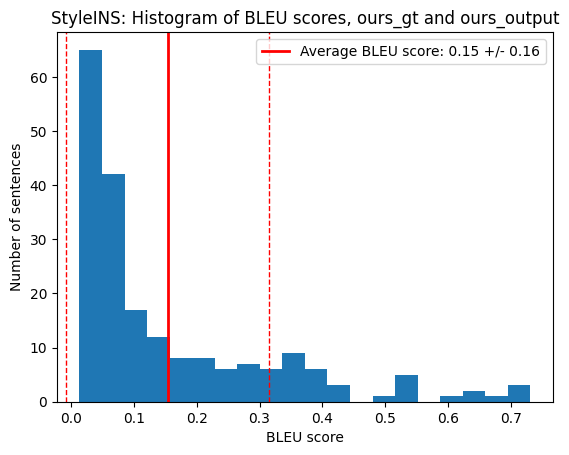

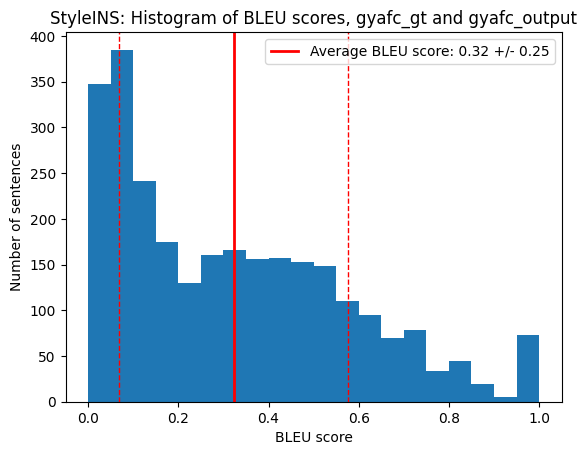

In [82]:
# compute bleu score between two datasets, ours_gt and ours_output
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

def calculate_bleu(data, ref_key, hyp_key, title):

    # compute bleu score for each sentence
    bleu_scores = [
        sentence_bleu(
            [ref],
            hyp,
            smoothing_function=SmoothingFunction().method1
        ) for ref, hyp in zip(data[ref_key], data[hyp_key])]

    # compute average bleu score
    avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
    std_bleu_score = (sum([(score - avg_bleu_score) ** 2 for score in bleu_scores]) / len(bleu_scores)) ** 0.5

    # plot a histogram of bleu scores
    import matplotlib.pyplot as plt

    plt.hist(bleu_scores, bins=20)
    plt.xlabel('BLEU score')
    plt.ylabel('Number of sentences')
    plt.title(f'{title}: Histogram of BLEU scores, {ref_key} and {hyp_key}')

    # draw vertical lines for average and median bleu scores with standard deviation
    plt.axvline(avg_bleu_score, color='r', linestyle='solid', linewidth=2)

    plt.axvline(avg_bleu_score + std_bleu_score, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(avg_bleu_score - std_bleu_score, color='r', linestyle='dashed', linewidth=1)

    plt.legend([
        f'Average BLEU score: {avg_bleu_score:.2f} +/- {std_bleu_score:.2f}'
    ])
    plt.savefig(f'plots/{title}_{ref_key}_{hyp_key}.png')
    plt.show()

    return bleu_scores

syleins_bleu_ours = calculate_bleu(styleins_data, 'ours_gt', 'ours_output', 'StyleINS')
syleins_bleu_gyafc = calculate_bleu(styleins_data, 'gyafc_gt', 'gyafc_output', 'StyleINS')

In [83]:
thank_you_bart_data = {
    'ours_gt': 'StyleINS/ours_formal.txt',
    'ours_output': 'ThankYouBart/outputs_ours/bart_em_0.0.0.1.txt',
    'gyafc_gt': 'StyleINS/gyafc_test_formal.txt',
    'gyafc_output': 'ThankYouBart/outputs_gyafc/bart_em_0.0.0.1.txt',
}

# read data
thank_you_bart_data = {k: read_data(v) for k, v in thank_you_bart_data.items()}

# print first 5 sentences from each dataset
for k, v in thank_you_bart_data.items():
    print(k)
    for line in v[:5]:
        print(line)
    print()

ours_gt
['do', "n't", 'ever', 'let', 'somebody', 'tell', 'you', 'that', 'you', 'can', 'not', 'do', 'something', ',', 'not', 'even', 'me', '.']
['i', 'am', 'the', 'type', 'of', 'person', 'who', ',', 'if', 'you', 'ask', 'me', 'a', 'question', 'and', 'i', 'do', "n't", 'know', 'the', 'answer', ',', 'i', 'will', 'inform', 'you', 'that', 'i', 'do', 'not', 'know', '.']
['however', ',', 'i', 'am', 'confident', 'that', 'i', 'have', 'the', 'skills', 'to', 'find', 'the', 'answer', 'and', 'will', 'do', 'so', '.']
['there', 'is', 'an', "'", 'i', "'", 'in', '``', 'happiness', ',', "''", 'and', 'there', 'is', 'no', "'", 'y', '.', "'", 'it', 'is', 'spelled', 'with', 'an', "'", 'i', '.', "'"]
['if', 'you', 'have', 'a', 'dream', ',', 'you', 'must', 'protect', 'it', '.']

ours_output
['do', "n't", 'ever', 'let', 'somebody', 'tell', 'you', 'you', 'ca', "n't", 'do', 'anything', ',', 'not', 'even', 'me', '.']
['i', "'m", 'the', 'type', 'of', 'person', 'who', 'if', 'you', 'ask', 'me', 'a', 'question', 'and',

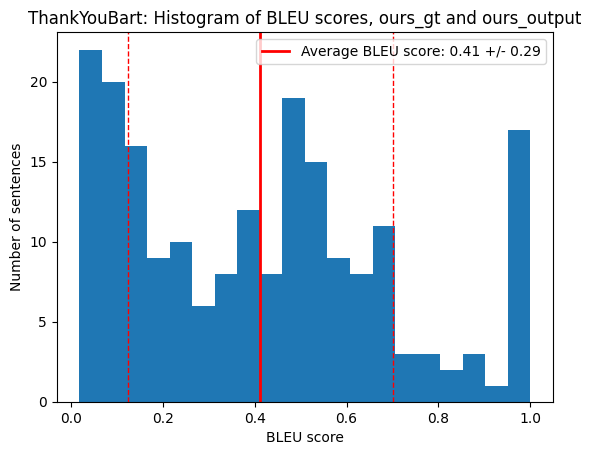

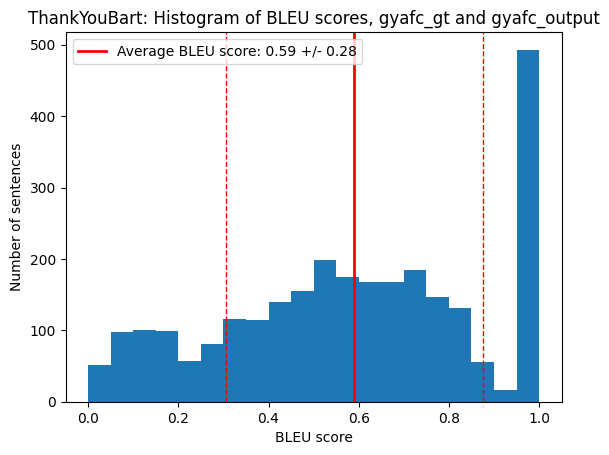

In [84]:
thank_you_bart_bleu_ours = calculate_bleu(thank_you_bart_data, 'ours_gt', 'ours_output', 'ThankYouBart')
thank_you_bart_bleu_gyafc = calculate_bleu(thank_you_bart_data, 'gyafc_gt', 'gyafc_output', 'ThankYouBart')

In [85]:
semifst_data = {
    'ours_gt': 'StyleINS/ours_formal.txt',
    'ours_output': 'SemiFST/ours_results.txt',
    'gyafc_gt': 'GYAFC_Corpus/Entertainment_Music/test/formal.ref0',
    'gyafc_output': 'SemiFST/gyafc_results.txt',
}

# read data
semifst_data = {k: read_data(v) for k, v in semifst_data.items()}

# print first 5 sentences from each dataset
for k, v in semifst_data.items():
    print(k)
    for line in v[:5]:
        print(line)
    print()

ours_gt
['do', "n't", 'ever', 'let', 'somebody', 'tell', 'you', 'that', 'you', 'can', 'not', 'do', 'something', ',', 'not', 'even', 'me', '.']
['i', 'am', 'the', 'type', 'of', 'person', 'who', ',', 'if', 'you', 'ask', 'me', 'a', 'question', 'and', 'i', 'do', "n't", 'know', 'the', 'answer', ',', 'i', 'will', 'inform', 'you', 'that', 'i', 'do', 'not', 'know', '.']
['however', ',', 'i', 'am', 'confident', 'that', 'i', 'have', 'the', 'skills', 'to', 'find', 'the', 'answer', 'and', 'will', 'do', 'so', '.']
['there', 'is', 'an', "'", 'i', "'", 'in', '``', 'happiness', ',', "''", 'and', 'there', 'is', 'no', "'", 'y', '.', "'", 'it', 'is', 'spelled', 'with', 'an', "'", 'i', '.', "'"]
['if', 'you', 'have', 'a', 'dream', ',', 'you', 'must', 'protect', 'it', '.']

ours_output
['do', 'not', 'ever', 'let', 'anyone', 'tell', 'you', 'that', 'you', 'can', 'not', 'do', 'something', ',', 'not', 'even', 'me', '.']
['if', 'you', 'ask', 'me', 'a', 'question', 'and', 'i', 'do', 'not', 'know', 'the', 'answer

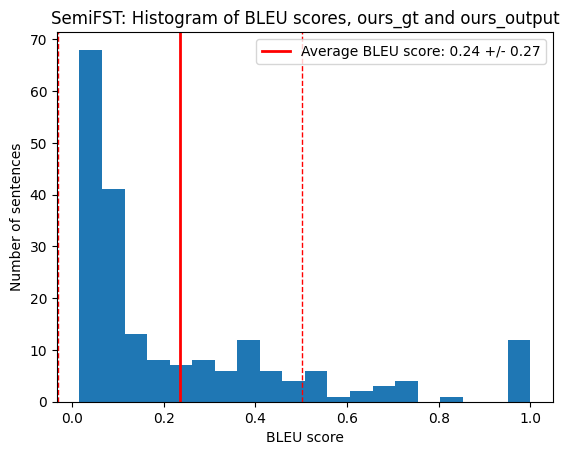

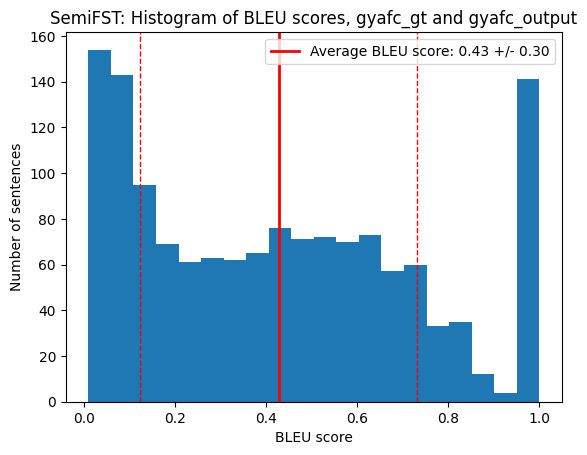

In [87]:
semifst_bleu_ours = calculate_bleu(semifst_data, 'ours_gt', 'ours_output', 'SemiFST')
semifst_bleu_gyafc = calculate_bleu(semifst_data, 'gyafc_gt', 'gyafc_output', 'SemiFST')

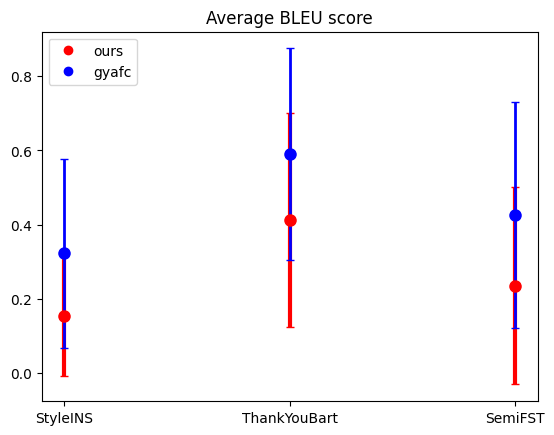

In [94]:

import matplotlib.pyplot as plt

# plot average bleu score for each dataset with standard deviation on one plot
# x label should be paper name _ dataset name, y label should be average bleu score, title should be 'Average BLEU score'

# plot ours on 1st plot, gyafc on 2nd plot

def mean(bleu_scores):
    return sum(bleu_scores) / len(bleu_scores)

def std(bleu_scores):
    avg = mean(bleu_scores)
    return (sum([(score - avg) ** 2 for score in bleu_scores]) / len(bleu_scores)) ** 0.5

plt.plot(['StyleINS', 'ThankYouBart', 'SemiFST'], [mean(syleins_bleu_ours), mean(thank_you_bart_bleu_ours), mean(semifst_bleu_ours)], 'ro', label='ours')
plt.plot(['StyleINS', 'ThankYouBart', 'SemiFST'], [mean(syleins_bleu_gyafc), mean(thank_you_bart_bleu_gyafc), mean(semifst_bleu_gyafc)], 'bo', label='gyafc')
plt.errorbar(['StyleINS', 'ThankYouBart', 'SemiFST'], [mean(syleins_bleu_ours), mean(thank_you_bart_bleu_ours), mean(semifst_bleu_ours)], yerr=[std(syleins_bleu_ours), std(thank_you_bart_bleu_ours), std(semifst_bleu_ours)], fmt='ro', linewidth=3, capsize=3, markersize=8)
plt.errorbar(['StyleINS', 'ThankYouBart', 'SemiFST'], [mean(syleins_bleu_gyafc), mean(thank_you_bart_bleu_gyafc), mean(semifst_bleu_gyafc)], yerr=[std(syleins_bleu_gyafc), std(thank_you_bart_bleu_gyafc), std(semifst_bleu_gyafc)], fmt='bo', linewidth=2, capsize=3, markersize=8)

plt.title('Average BLEU score')

plt.legend()
plt.savefig(f'plots/average_bleu_score.png')
plt.show()

In [ ]:
#